In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ReviewData = pd.read_csv("C:\\Users\\HPWorld\\aiml\\train.csv")

In [7]:
ReviewData.shape

(38932, 5)

In [8]:
ReviewData.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [10]:
ReviewData.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id28588,1
Description,38932,38932,"This was a great place to stay, especially if ...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [11]:
ReviewData.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [39]:
round(ReviewData.Is_Response.value_counts(normalize=True)*100,2)

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64

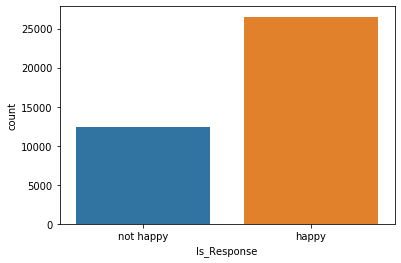

In [51]:
sns.countplot(x='Is_Response', data = ReviewData)

In [42]:
ReviewData.drop(['User_ID','Browser_Used','Device_Used'],inplace=True, axis=1)

In [43]:
ReviewData.head(3)

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy


In [44]:
import re
import string

In [52]:
def text_clean1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','', text)
    return text

cleaned1 = lambda x1: text_clean1(x1)
    

In [53]:
ReviewData['cleaned_description'] = pd.DataFrame(ReviewData.Description.apply(cleaned1))

In [54]:
ReviewData.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [55]:
def text_clean2(text):
    text = re.sub('[''""...]','', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x1: text_clean2(x1)

In [56]:
ReviewData['cleaned_desc_new'] = pd.DataFrame(ReviewData['cleaned_description'].apply(cleaned2))

In [57]:
ReviewData.head()

,Description,Is_Response,cleaned_description,cleaned_desc_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
X = ReviewData.cleaned_desc_new 
y = ReviewData.Is_Response

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=255)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [77]:
tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

In [84]:
model = Pipeline([('vectorizer',tvec),('classifier',lr)])
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [91]:
prediction = model.predict(X_test)

In [92]:
prediction

array(['not happy', 'happy', 'happy', ..., 'happy', 'happy', 'happy'],
      dtype=object)

In [93]:
confusion_matrix(prediction,y_test)

array([[2458,  319],
       [ 141,  976]], dtype=int64)

In [94]:
accuracy_score(prediction,y_test)

0.881869542886492

In [116]:
example = [input()]
result =model.predict(example)

testy


In [117]:
result

array(['happy'], dtype=object)